In [1]:
import math
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from astropy import constants as const 
import Code_Perf as cp # imports functions
import time
from astropy.modeling.models import BlackBody

#######################
#constants# 
#######################
G = (const.G).cgs.value       
c = (const.c).cgs.value     
Ro = (const.R_sun).cgs.value            
Mo = (const.M_sun).cgs.value       
yr = (u.yr).to(u.s)                
kpc = (u.kpc).to(u.cm)             
pc = (u.pc).to(u.cm)              
m_pr = (u.M_p).to(u.g)         
m_el = (u.M_e).to(u.g)         
kb = (const.k_B).cgs.value
h = (const.h).cgs.value 
q = (const.e.gauss).value                
sigmaT = (const.sigma_T).cgs.value               
eV = (u.eV).to(u.erg)   
B_cr = 2*np.pi*m_el**2*c**3/(h*q)

In section Section 3 of (Stathopoulos et al. 2023) Code: Performance and testing we demonstrate a series of performance tests on the impact of the grid resolution to the excecution time and the conservation of energy in complete cooling cases.

In [2]:
# Code performance for the Synchrotron case only
# Plotting the number of grid points per decade vs time & Luminosity ratio vs number of grid points per decade

# Define an array of gamma values using a logarithmic scale
gamma_grid = np.logspace(np.log10(30), np.log10(2000), 40) 

# Initialize empty lists to store results
El_lum_grid_t1 = []
Ph_lum_grid_t1 = []
Time_elapsed_t1 = []
Number_of_points_t1 = []

# Iterate over several grid sizes
for i in range(len(gamma_grid)):
    # Set up the parameter values for the LeMoC_syn_test function
    # params = (log10(R0), log10(B0), log10(γ_min), log10(γ_max), log10(el,comp), δ, # grid_points)
    params = [15., 3., 0., 9, -4.18, 2.01, np.log10(30.), gamma_grid[i]]
    
    # Call the LeMoC_syn_test function
    gg = cp.LeMoC_syn_test(params)  # This is a simplified version of LeHaMoC that considers only synchrotron
    
    g_min_el = params[2]
    g_max_el = params[3]
    grid_size = int(params[7])
    
    # Calculate and store the number of points per decade
    Number_of_points_t1.append(cp.N_of_points_per_decade(np.logspace(g_min_el, g_max_el, grid_size), 10**0., 10**1.))
    
    # Store the results for luminosity and time
    El_lum_grid_t1.append(gg[0])
    Ph_lum_grid_t1.append(gg[1])
    Time_elapsed_t1.append(gg[2])

In [3]:
# Code performance for the Inverse Compton case only where a Black Body with temperature T=10^5k is assumed
# Plotting the number of grid points per decade vs time & Luminosity ratio vs number of grid points per decade

# Define an array of gamma values using a logarithmic scale
gamma_grid = np.logspace(np.log10(10),np.log10(1500),40)

# Initialize empty lists to store results
El_lum_grid_t2 = []
Ph_lum_grid_t2 = []
Time_elapsed_t2 = []
Number_of_points_t2 = []

# Iterate over several grid sizes
for i in range(0,len(gamma_grid)):
    # Set up the parameter values for the LeMoC_IC_test function
    # params = (log10(R0), log10(B0), log10(γ_min), log10(γ_max), log10(el,comp), δ, # grid_points)
    params = [15.,3.,0.,3.,-4.18,2.01,np.log10(30.),gamma_grid[i]]
    
    # Call the LeMoC_IC_test function
    gg = cp.LeMoC_IC_test(params) # This is a simplified version of LeHaMoC that considers only Inverse Compton with a Black Body with temperature T=10^5k to be the target photon field 
    
    g_min_el = params[2]
    g_max_el = params[3]
    grid_size = int(params[7])

    # Calculate and store the number of points per decade
    Number_of_points_t2.append(cp.N_of_points_per_decade(np.logspace(g_min_el,g_max_el,grid_size),10**0.,10**1.))
    
    # Store the results for luminosity and time
    El_lum_grid_t2.append(gg[0])
    Ph_lum_grid_t2.append(gg[1])
    Time_elapsed_t2.append(gg[2]) 

In [4]:
# Code performance for the Synchrotron self-Compton
# Plotting the number of grid points per decade vs time & Luminosity ratio vs number of grid points per decade

# Define an array of gamma values using a logarithmic scale
gamma_grid = np.logspace(np.log10(30),np.log10(2000),40)

# Initialize empty lists to store results
El_lum_grid_t3 = []
Ph_lum_grid_t3 = []
Time_elapsed_t3 = []
Number_of_points_t3 = []

# Iterate over several grid sizes
for i in range(0,len(gamma_grid)):
    
    # Set up the parameter values for the LeMoC_SSC_test function
    # params = (log10(R0), log10(B0), log10(γ_min), log10(γ_max), log10(el,comp), δ, # grid_points)
    params = [15.,3.,0.,9,-4.18,2.01,np.log10(30.),gamma_grid[i]]
    gg = cp.LeMoC_SSC_test(params)
    
    g_min_el = params[2]
    g_max_el = params[3]
    grid_size = int(params[7])
    
    # Calculate and store the number of points per decade
    Number_of_points_t3.append(cp.N_of_points_per_decade(np.logspace(g_min_el,g_max_el,grid_size),10**0.,10**1.))
    
    # Store the results for luminosity and time
    El_lum_grid_t3.append(gg[0])
    Ph_lum_grid_t3.append(gg[1])
    Time_elapsed_t3.append(gg[2])   

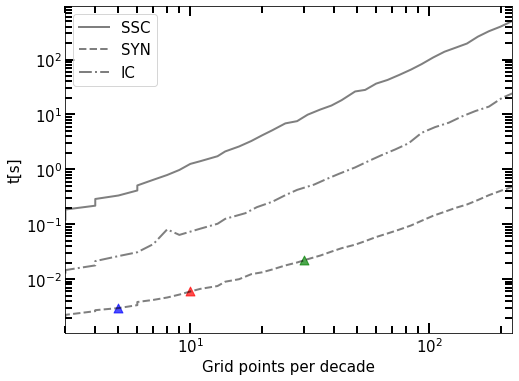

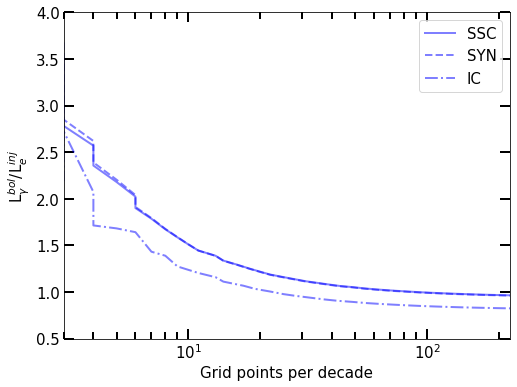

In [5]:
#Plotting the results

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15) 
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
plt.loglog(Number_of_points_t3,Time_elapsed_t3,c="k",lw=2,ls="solid",alpha=0.5,label="SSC")
plt.loglog(Number_of_points_t1,Time_elapsed_t1,c="k",lw=2,ls="dashed",alpha=0.5,label="SΥΝ")
plt.loglog(Number_of_points_t2,Time_elapsed_t2,c="k",lw=2,ls="-.",alpha=0.5,label="IC")
plt.scatter(5,np.interp(5,Number_of_points_t1,Time_elapsed_t1),c="b",alpha=0.7,marker='^',s=80)
plt.scatter(10,np.interp(10,Number_of_points_t1,Time_elapsed_t1),c="r",alpha=0.7,marker='^',s=80)
plt.scatter(30,np.interp(30,Number_of_points_t1,Time_elapsed_t1),c="g",alpha=0.7,marker='^',s=80)
plt.ylabel("t[s]",fontsize=15)
plt.xlabel("Grid points per decade",fontsize=15)
plt.legend(fontsize=15)
plt.xlim(3,max(Number_of_points_t1))
plt.savefig("tvsgridpoints",dpi=300)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15) 
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
plt.plot(Number_of_points_t3,np.divide(Ph_lum_grid_t3,El_lum_grid_t3),c="b",lw=2,ls="solid",alpha=0.5,label="SSC")
plt.plot(Number_of_points_t1,np.divide(Ph_lum_grid_t1,El_lum_grid_t1),c="b",lw=2,ls="dashed",alpha=0.5,label="SYN")
plt.plot(Number_of_points_t2,np.divide(Ph_lum_grid_t2,El_lum_grid_t2),c="b",lw=2,ls="-.",alpha=0.5,label="IC")
ax.set_xscale("log", nonpositive='clip')
ax.set_yscale("linear")
plt.xlabel("Grid points per decade",fontsize=15)
plt.ylabel("L$_{γ}^{bol}$/L$_{e}^{inj}$",fontsize=15)
plt.ylim(0.5,4.)
plt.xlim(3,max(Number_of_points_t1))
plt.legend(fontsize=15)
plt.savefig("ratiovsgridpoints",dpi=300)

/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/Code_Perf.py:732: RuntimeWarning: overflow encountered in exp
  return np.exp(-gamma_b(M_F,Radius,U_ph)/gamma)*gamma_b(M_F,Radius,U_ph)*Radius/(c*gamma**2.)*np.trapz(Q_el_interp*gamma_space*np.exp(gamma_b(M_F,Radius,U_ph)/gamma_space),np.log(gamma_space))
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/Code_Perf.py:732: RuntimeWarning: overflow encountered in multiply
  return np.exp(-gamma_b(M_F,Radius,U_ph)/gamma)*gamma_b(M_F,Radius,U_ph)*Radius/(c*gamma**2.)*np.trapz(Q_el_interp*gamma_space*np.exp(gamma_b(M_F,Radius,U_ph)/gamma_space),np.log(gamma_space))
/home/sis/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4234: RuntimeWarning: overflow encountered in add
  ret = (d * (y[tuple(slice1)] + y[tuple(slice2)]) / 2.0).sum(axis)
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/Code_Perf.py:732: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(-gamma_b(M_F,Radius,U_ph)/ga

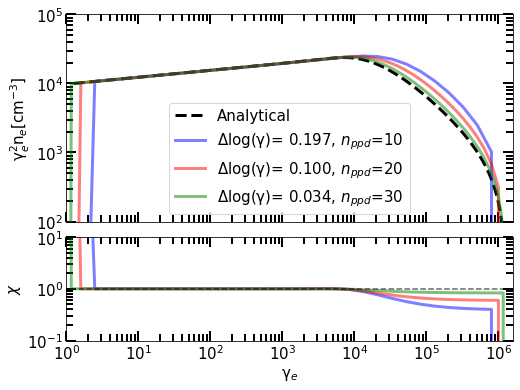

In [2]:
# Comparison between analytical and numerical solution

# Set constants and initial parameters
M_F = 1.0  # Magnetic field
Radius = R0 = 10**15.0  # Radius of the source
U_ph = 0  # Photon field density
U_B = M_F**2. / (8. * np.pi)  # Magnetic field density

# Lists to store results
Number_of_points = []
Delta_logg = []
g_el_space = []
N_el_space = []

# Different grid sizes to compare
grid_size = [30, 60, 180]

# Iterate over each grid size
for grid_size_el in grid_size:
    # Set up the parameter values for the cp.LeMoC_noBB_no_exp function
    params = [15., 0., 0.1, 6.1, -4.18, 1.9, np.log10(30.), int(grid_size_el + 2)]
    
    # Calculate and store the number of points per decade
    Number_of_points.append(cp.N_of_points_per_decade(np.logspace(params[2], params[3], int(grid_size_el + 2)), 10**1., 10**2.))
    
    # Call the LeMoC_noBB_no_exp function
    gg = cp.LeMoC_noBB_no_exp(params)  # This is a simplified version of LeHaMoC which takes into account only leptonic processes
    
    # Store relevant results
    g_el_space.append(gg[2])
    Delta_logg.append(np.log10(gg[2][2]) - np.log10(gg[2][1]))
    N_el_space.append(gg[3][-1] / cp.Volume(R0))

# Calculate grid size for simulation
grid_size = int(np.log10(10**(params[3]) / 10**params[2]) * 30)
g_el = g_el_simulated = np.logspace(0.1, 6.1, int(grid_size))
Q_el = cp.Q_el_Lum(cp.Lum_e_inj(10**(-4.18), Radius), 1.9, 10**0.1, 10**6.1) * g_el**(-1.9)

# Calculate the analytical solution according to Inoue, S. & Takahara, F. 1996
N_el_th = []
for gamma in g_el:
    N_el_th.append(cp.N_el_theory(g_el, gamma, M_F, Radius, Q_el, U_ph))

# Handle NaN values
for i in range(len(N_el_th)):
    if math.isnan(N_el_th[i]):
        N_el_th[i] = N_el_th[55] * (g_el_simulated[55] / g_el_simulated[i])**(1.9)

# Identify 'inf' values
inf_indices = [i for i, x in enumerate(N_el_th) if x == np.inf]

# Identify known values
known_indices = [i for i in range(len(N_el_th)) if i not in inf_indices]

# Interpolate 'inf' values
for index in inf_indices:
    N_el_th[index] = 10.**np.interp(index, known_indices, [np.log10(N_el_th[i]) for i in known_indices])

# Prepare data for plotting
x1, y1 = g_el_simulated, g_el_simulated**2. * N_el_th / cp.Volume(R0)
x2, y2 = g_el_space[0], N_el_space[0]
x3, y3 = g_el_space[1], N_el_space[1]
x4, y4 = g_el_space[2], N_el_space[2]

# Plot the results
cp.plotting_res_3(x1, y1, x2, y2, x3, y3, x4, y4, "γ$_{e}^2$n$_{e}$[cm$^{-3}$]", "γ$_{e}$",
                  10**0., 10**6.2, 10**2., 10**5., "Analytical", "Δlog(γ)= %s, $n_{ppd}$=10" % format(Delta_logg[0], ".3f"),
                  "Δlog(γ)= %s, $n_{ppd}$=20 " % format(Delta_logg[1], ".3f"), "Δlog(γ)= %s, $n_{ppd}$=30 " % format(Delta_logg[2], ".3f"),
                  "N_elvsgridpoints")
